In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
import matplotlib
matplotlib.style.use('ggplot')
import os
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
data_path = '../data/heart.csv'

In [3]:
df = pd.read_csv(data_path)

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.shape

(918, 12)

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### Segregating the target and independent variable

In [8]:
target = df['HeartDisease'].values
data = df.drop('HeartDisease',axis=1)

In [10]:
def continuous_categorical(data):
    int_col = [c for c in data.columns if data[c].dtype == 'int64' or data[c].dtype == 'float64']
    str_col = [c for c in data.columns if c not in int_col]
    return int_col,str_col

In [80]:
int_col,strcol = continuous_categorical(df)

## Exploratory Data Analysis

In [12]:
profile = ProfileReport(df)

In [13]:
profile.to_file('Data_Profiling.pdf')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/varun/miniconda3/lib/python3.9/site-packages/pandas_profiling/profile_report.py:262: UserWarning: Extension .pdf not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Correlation Plot

In [60]:
px.imshow(df.corr(),title='Correlation Plot for the Data')

### Conclusions for Continuous Data:
- The target variable Heart Disease has a negative correlation with "MaxHR" and "Cholestrol"
- The target variable Heart Disease has a negative correlation with "OldPeak", "FastingBS" and "RestingBP"

## For Categorical Data we will see the distribution per column

In [40]:


## Distribution of Heart Disease w.r.t Sex


fig = px.histogram(
    df,
    x = "HeartDisease",
    color = "Sex",
    hover_data=df.columns,
    title="Distribution of Heart Disease w.r.t Sex",
    barmode="group"
)

fig.show()

In [41]:
## Distribution of Heart Disease w.r.t ChestPainType

fig = px.histogram(
    df,
    x = "HeartDisease",
    color = "ChestPainType",
    hover_data=df.columns,
    title="Distribution of Heart Disease w.r.t ChestPainType",
    barmode="group"
)

fig.show()

In [37]:
## Distribution of Heart Disease w.r.t RestingECG

fig = px.histogram(
    df,
    x = "HeartDisease",
    color = "RestingECG",
    hover_data=df.columns,
    title="Distribution of Heart Disease w.r.t RestingECG",
    barmode="group"
)

fig.show()

In [38]:
## Distribution of Heart Disease w.r.t ExerciseAngina

fig = px.histogram(
    df,
    x = "HeartDisease",
    color = "ExerciseAngina",
    hover_data=df.columns,
    title="Distribution of Heart Disease w.r.t ExerciseAngina",
    barmode="group"
)

fig.show()

In [76]:
## Distribution of Heart Disease w.r.t ST_Slope

fig = px.histogram(
    df,
    x = "HeartDisease",
    color = "ST_Slope",
    hover_data=df.columns,
    title="Distribution of Heart Disease w.r.t ST_Slope",
    barmode="group"
)

fig.show()

## Plotting Bivariate Distributions in Dataset using PairPlot

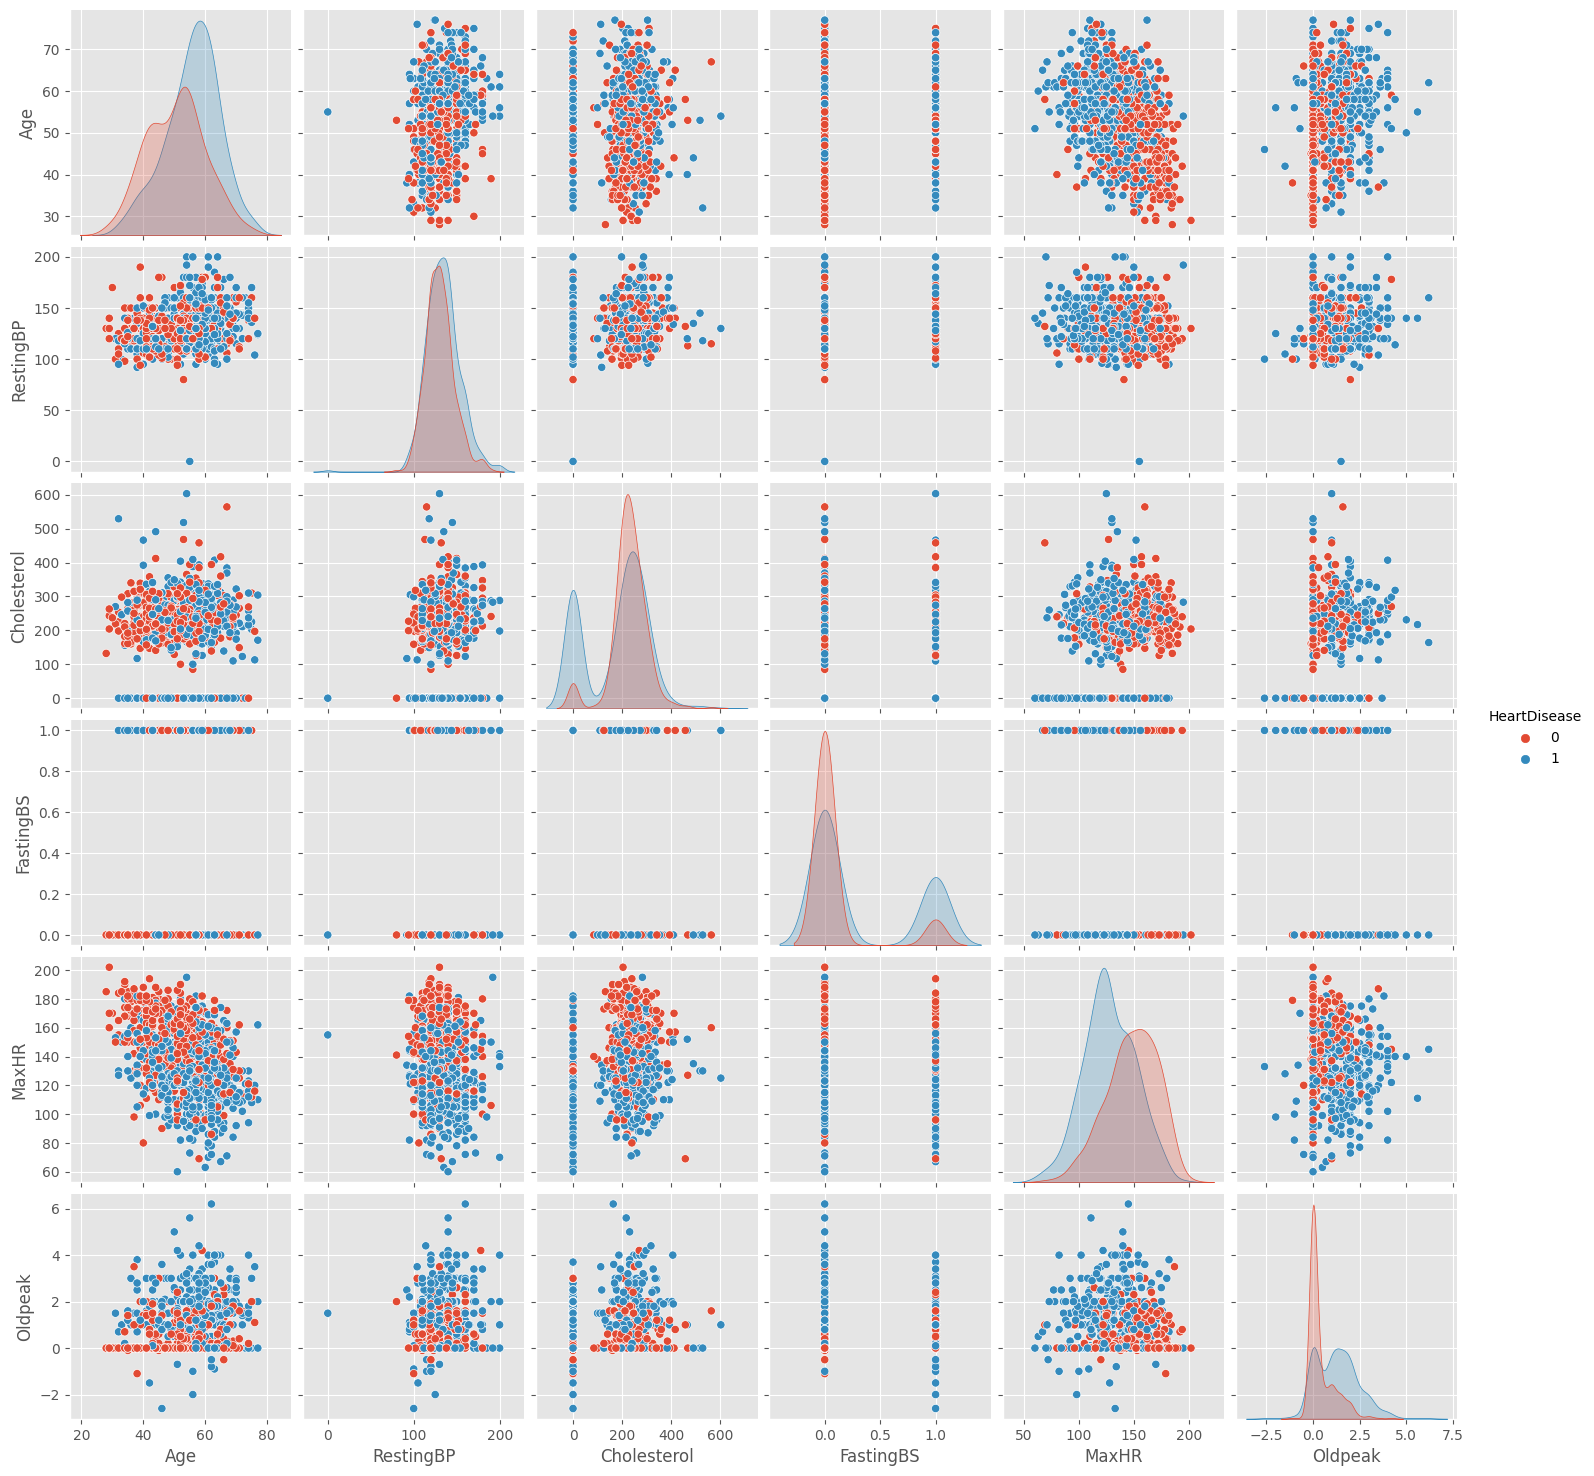

In [57]:
sns.pairplot(df,hue="HeartDisease")
plt.show()

### Density plot to get the distribution shapes of the features

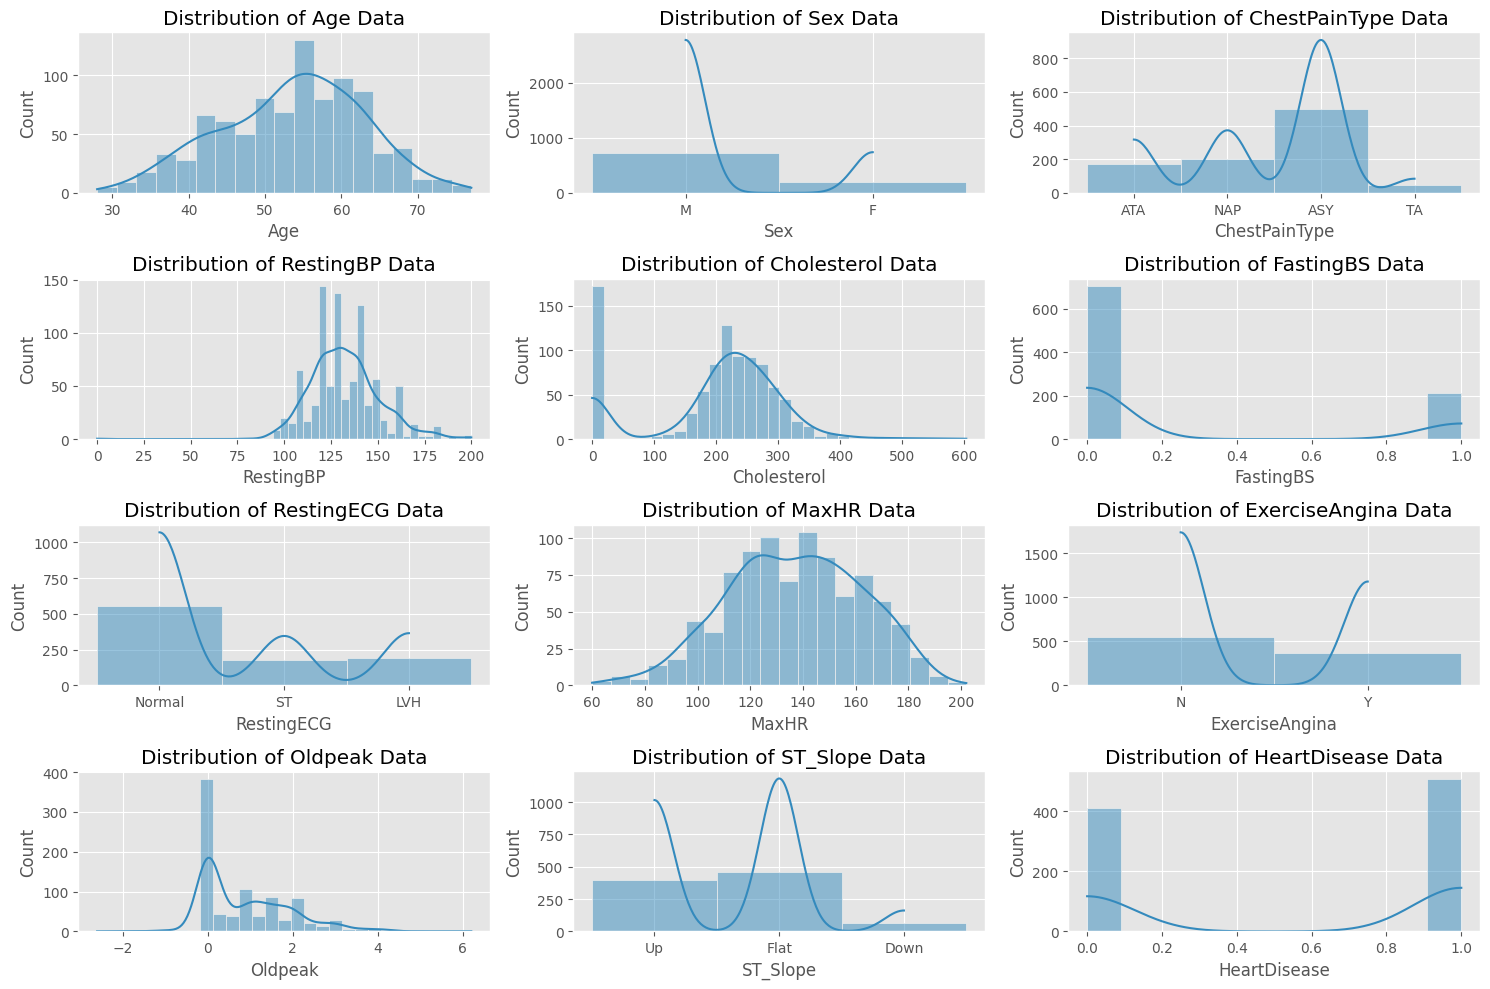

In [79]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

### Checking for outiers by plotting box plot

In [82]:
int_col

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [100]:
fig  = px.box(df,y='Age',x='HeartDisease',title='Distribution of Age')
fig.show()

In [102]:
fig  = px.box(df,y='Age',x='HeartDisease',color='Sex',title='Distribution of Age')
fig.show()

In [106]:
fig  = px.box(df,y='RestingBP',x='HeartDisease',title='Distribution of RestingBP')
fig.show()

In [108]:
fig  = px.box(df,y='Cholesterol',x='HeartDisease',title='Distribution of Cholesterol')
fig.show()

In [109]:
fig  = px.box(df,y='FastingBS',x='HeartDisease',title='Distribution of FastingBS')
fig.show()

In [110]:
fig  = px.box(df,y='MaxHR',x='HeartDisease',title='Distribution of MaxHR')
fig.show()

In [112]:
fig  = px.box(df,y='Oldpeak',x='HeartDisease',title='Distribution of Oldpeak')
fig.show()

## Data Preprocessing
- Handling Null Values
- Feature Scaling
- Handling Categorical values

### 1) Handling Null Values

In [115]:
# Let us check for the percentage of null values that we have

for i in df.columns:
    print(f"Number of Null values in column {i} ------> {df[i].isna().sum()}")

Number of Null values in column Age ------> 0
Number of Null values in column Sex ------> 0
Number of Null values in column ChestPainType ------> 0
Number of Null values in column RestingBP ------> 0
Number of Null values in column Cholesterol ------> 0
Number of Null values in column FastingBS ------> 0
Number of Null values in column RestingECG ------> 0
Number of Null values in column MaxHR ------> 0
Number of Null values in column ExerciseAngina ------> 0
Number of Null values in column Oldpeak ------> 0
Number of Null values in column ST_Slope ------> 0
Number of Null values in column HeartDisease ------> 0


### Conclusion 
 - There are no null values in any of the columns

### 2) Feature Scaling

#### Notes:
- Feature Scaling is really important for Distance based algorithms
    - KNN
    - SVM
    - KMeans

- Most of the tree based algorithms like
    - Decision Trees
    - Random Forest
    - Gradient Boosting
    
    #### Do not require normalization/standardization

### When to use Normalization vs Standardization?

### Normalization
- Normalization can be used when we know that the data that we are using does not follow a Gaussian Nature.
- Mostly useful in Algorithms which do not assume any distribution of data e.g KNN and Neural Networks

### Standardization
- It can be sometimes useful when the data follows a Gaussian Distribution
- Unlike Normalozation, Standardization does not have a bounding range, that is, if the data has outliers, they will not be affected by standardization

## 3) Handling Categorical Values

### OneHotEncoding vs LabelEncoder
- ### OneHotEncoder
    - The advantage of OHE is when converting the Ordinal (Categorical variable with a certain order),the essence is not lost and it also creates a Orthogonal matrix
    - The Disadvantage of OHE is that, with more such variables the Dataframe can increase in size very quickly and hence requires a dimensionality reduction algorithm like PCA, which is a very strong combo
    - For Non Tree based algorithms OHE is the best technique to use

- #### LabelEncoder
    - Label Encoder are helpful to avoid increase in the size of the data
    - Best technique for Tree Based Algo 


In [18]:
# dd['Sex'] = dd['Sex'].map({'M':1,'F':0})

In [19]:
# dd['ExerciseAngina'] = dd['ExerciseAngina'].map({'Y':1,'N':0})